## Minimizing Customers Churn Rate Through Analysis of Financial Habits


Subscriptions are the main source of revenue for many companies in different industries. Because of this, companies want always to minimize the number of customers that cancel their subscriptions (customer churn). The target audience of this study is the a financial app's subscription base as they're the ones the company wants to keep.

Goal: Predict which users are likely to churn based on their financial habits, so that the company can focus on re-engaging these users with their products

__Import Libraries and Acquire the Data__

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
# Read dataset
data = pd.read_csv('churn_data.csv')
data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [3]:
data.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


__Data cleaning__

In [4]:
# Remove NaN's if NaN's are present in any column

# Check what columns have NaN's
data.isna().any()

# count the NaN's that are present
#data.isna().sum()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

As the numbers of 'credit_score' and 'rewards_earned' rows are very big, I will remove them from the features to consider when building the model.
In the case of 'age' which also has NaNs, I will remove only those raws that do not have real values for age.

In [7]:
# Remove the rows with NaN's in 'age' column
data = data[pd.notnull(data['age'])]

In [9]:
# Remove 'credit_score' and 'rewards_earned' columns
data = data.drop(columns=['credit_score', 'rewards_earned'])

In [18]:
data_backup = data

### Exploratory Data Analysis

Check Data Histograms

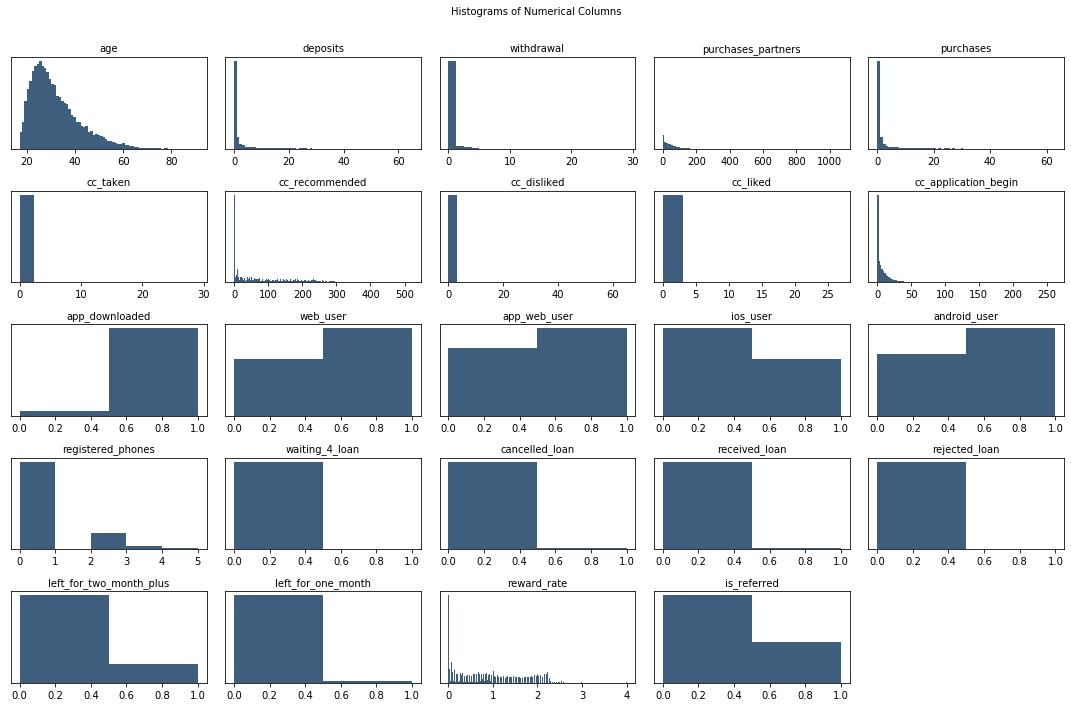

In [20]:
# First, make a copy of the dataset without the numerical columns:
# 'user', 'churn', 'payment_type' and 'zodiac_sign' and 'housing'
data2 = data.drop(columns=['user', 'churn', 'payment_type', 'zodiac_sign', 'housing'])

# Now plot the histograms for the numerical features
fig = plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns', fontsize = 10)

for i in range(1, data2.shape[1]+1):
    plt.subplot(6,5,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(data2.columns.values[i-1], fontsize = 10)
    
    vals = np.size(data2.iloc[:, i-1].unique())
    
    plt.hist(data2.iloc[:, i-1], bins= vals, color = '#3F5D7D')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Pie Charts

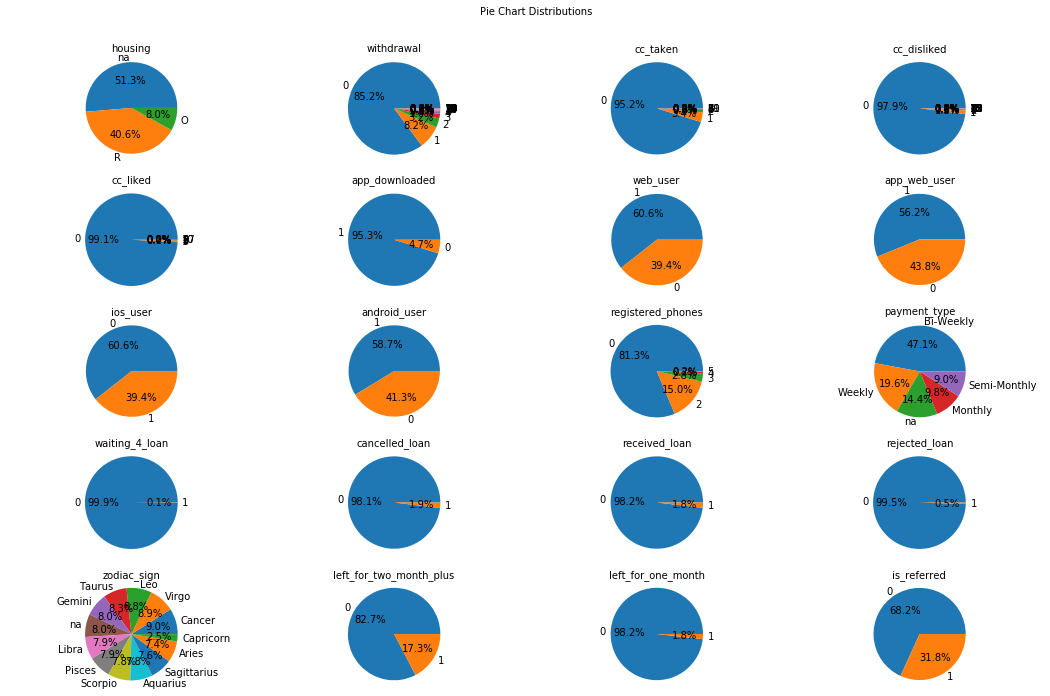

In [28]:
# Use the a dataset containing only the binary columns
# Remove from data2 = ['age', 'deposits','cc_recommended', 'purchases_partners','purchases','cc_application begin', 'reward_rate']

data3 = data.drop(columns=['user', 'churn','age', 'deposits','cc_recommended', 'purchases_partners','purchases','cc_application_begin', 'reward_rate'])
# Now plot the histograms for the numerical features
fig = plt.figure(figsize=(15,12))
plt.suptitle('Pie Chart Distributions', fontsize = 10)

for i in range(1, data3.shape[1]+1):
    plt.subplot(6,4,i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(data3.columns.values[i-1], fontsize = 10)
    values = data3.iloc[:, i-1].value_counts(normalize = True).values
    index = data3.iloc[:, i-1].value_counts(normalize = True).index
    
    plt.pie(values, labels = index, autopct= '%1.1f%%')
    plt.axis('equal')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

From the pie charts it can be observed that are features that are somehow evenly distributed such as 'android_user', ' ios_user', 'is_referred', etc. But there are also those that have a dominant state like 'rejected_loan' and 'received_loan'.

Those with dominant states have to be evaluated with respect to the target column 'churn' and see if the ration is also dominant.

In [29]:
data[data3.waiting_4_loan==1].churn.value_counts()  # The count below is acceptable

0    27
1     8
Name: churn, dtype: int64

In [30]:
data[data3.cancelled_loan==1].churn.value_counts() # Count below is good

1    274
0    234
Name: churn, dtype: int64

In [31]:
data[data3.received_loan==1].churn.value_counts() # Count below is good

1    292
0    199
Name: churn, dtype: int64

In [32]:
data[data3.rejected_loan==1].churn.value_counts()  # The count below is acceptable

1    107
0     25
Name: churn, dtype: int64

In conclusion, the small subsets have good ratios with target so there's no reason to remove them from the features.

__Correlation Plot__

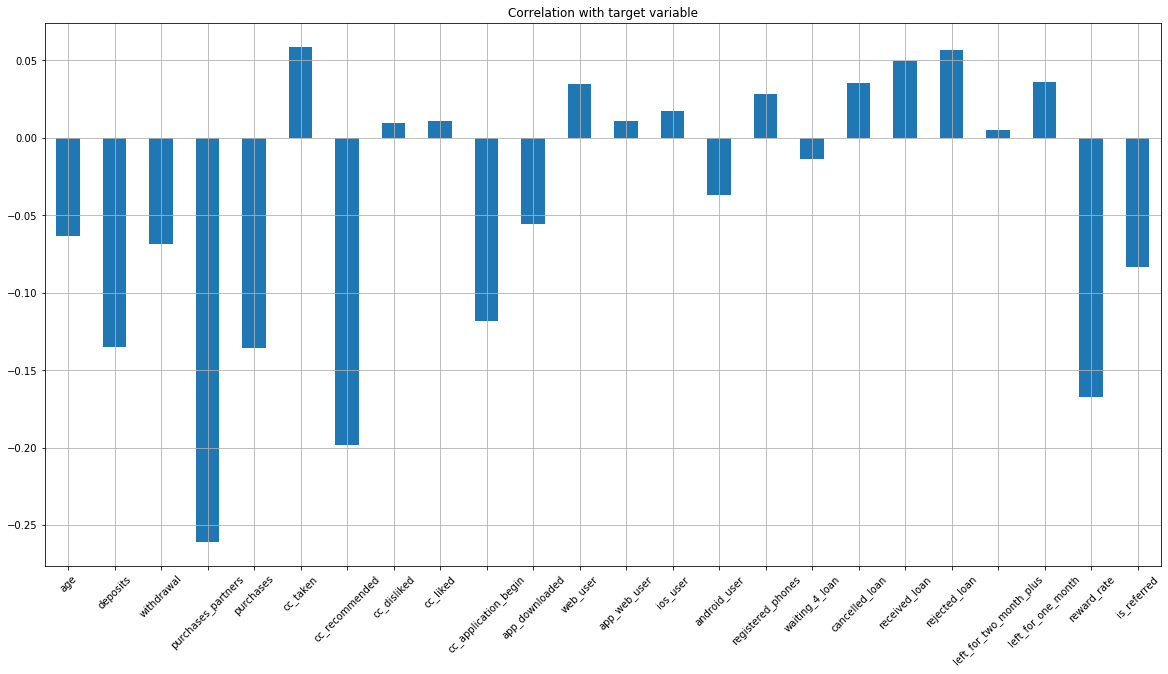

In [33]:
# Remove categorical variables
data.drop(columns=['churn','user','housing',
                   'payment_type','zodiac_sign']).corrwith(data.churn).plot.bar(
figsize=(20,10), title = 'Correlation with target variable', fontsize = 10,
rot = 45, grid = True)

The correlation plots tell us a lot about the features with respect to the customer's churn. For instance:
- The younger the person the more likely to churn
- The more deposits the customer has the more likely to stay
- In general, the less activity you have the more likely to churn. (deposits, withdrawals and purchases)
- cc_taken is telling us that if you take many credit cards you're likely to churn. Meaning that probably the credit cards are not good?
- if the customer gets a lot of recommendations less likely to churn
- if you like/dislike any of the products you're likely to churn
- The less applications you use the more likely to churn
- and so on.

__Correlation Matrix__

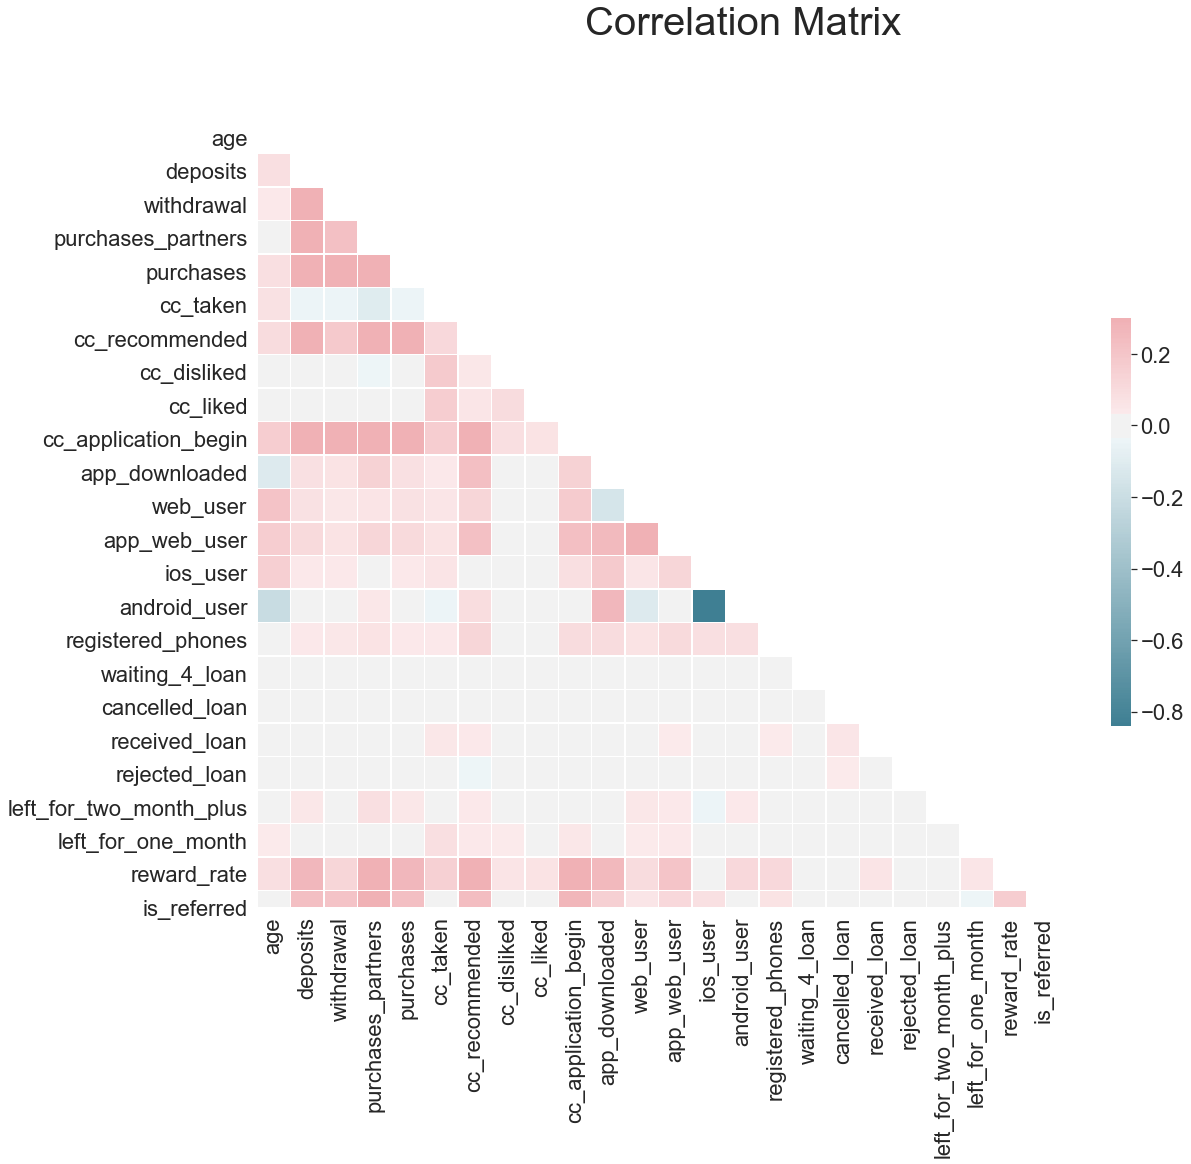

In [34]:
# Find correlation matrix
sn.set(style='white', font_scale=2)

# Compute the correlation matrix
corr = data.drop(columns=['user','churn']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (18,15))
f.suptitle('Correlation Matrix',fontsize=40)

# Generate a custom diverging colormap (optional)
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
          square=True, linewidths=0.5, cbar_kws={"shrink":0.5})

From the correlation matrix, we can observe a pair of features that are strongly (and negatively) correlated. These are ios_user vs. android_user. It makes sense to assume that an user that has one of the system doesn't have the other. We can remove one of these features without losing relevant info about it. (e.g. Male, Female)

Also, something that's not easily observed from the matrix is that app_web_user is in fact a linear dependent feature. In order to be active, it has to have the web_user active and one of the app_users active (android or ios).

In [35]:
# Remove 'app_web_user'
data = data.drop('app_web_user',axis=1)

In [36]:
# Save new dataset
data.to_csv('new_data.csv', index=False)

__Data Preparation__

In [37]:
# Separate user identifier from dataset
user_identifier = data['user']
data= data.drop('user',axis=1)

One-Hot Encoding: Convert categorical variables into independent binary features

In [38]:
# 'housing' is a categorical feature for example:
data.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [40]:
# Using get_dummies from pandas we can extend these categorical features into binary features. See below, how housing got 
# split into housing_O, housing_R and housing_na.
data = pd.get_dummies(data)
data.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [41]:
# Remove correlated features from the new ones created
data = data.drop(columns=['housing_na', 'zodiac_sign_na','payment_type_na'])

### Split the data into train and test sets

In [42]:
from sklearn.model_selection import train_test_split

# Remove target to create the X data
X = data.drop('churn',axis=1)
# the target corresponds to y
y = data['churn']
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101 )
# If I use random_state=0 I can replicate the results whenever I want

__Balancing the Training Set__

If the data is not balanced we could risk having accuracy results that depend on the number of samples that have a specific state (e.g. target - 0 or 1 where there are way more 1's in the training set)

In [43]:
# Check the target training data
y_train.value_counts()

0    12632
1     8964
Name: churn, dtype: int64

In [46]:
# Split the y_train dataset into positive and negative targets

#Get indexes
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

# determine what which has more values (pos or neg?)
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index
    
# Chop randomly the higher array down the size of lower
np.random.seed(0)
higher = np.random.choice(higher, size = len(lower))
lower = np.asarray(lower) # convert lower to a numpy array
new_indexes = np.concatenate((lower,higher))

# Trim datasets based on the new indexes
X_train = X_train.loc[new_indexes, ]
y_train = y_train[new_indexes]

__Feature Scaling__

In [48]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

# Note: I use a DataFrame after fitting the scaler because the scaler returns a numpy array without indexes and columns
# and I want to keep them

# Rename training sets
X_train = X_train2
X_test = X_test2

### Build the Model

I'll use Logistic Regression for a classification model

In [57]:
from sklearn.linear_model import LogisticRegression

# Create an instance of a logistic regression model and fit the training data
classifier = LogisticRegression(random_state = 0 , solver = 'lbfgs')
classifier.fit(X_train, y_train)

# NOTE: Added the solver argument to the classifier to avoid the warning messages.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Make predictions

In [58]:
predictions = classifier.predict(X_test)

Evaluate the results

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

# Find the confusion matrix
print(confusion_matrix(y_test, predictions))

[[1745 1445]
 [ 601 1609]]


In [60]:
# Print the classification report
print(classification_report(y_test, predictions))

# precision: Fraction of relevant instances among the retrieved instances
# recall: fraction of relevant instances that have been retrieved over the total amount of relevant instances
# f1-score:measure to use if we need to seek a balance between precision and recall AND there is an uneven class distribution
# (large number of Actual Negatives)

              precision    recall  f1-score   support

           0       0.74      0.55      0.63      3190
           1       0.53      0.73      0.61      2210

    accuracy                           0.62      5400
   macro avg       0.64      0.64      0.62      5400
weighted avg       0.66      0.62      0.62      5400



__Perform Cross-Validation__

In [61]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = classifier,
                            X= X_train,
                            y = y_train,
                            cv = 10)
# cv --> specifies the number of folds

In [54]:
accuracies

array([0.64604236, 0.6393534 , 0.63545151, 0.64604236, 0.64174107,
       0.65513393, 0.63616071, 0.640625  , 0.63169643, 0.64453125])

In [55]:
accuracies.mean()

0.6416778024964167

The cross-validation scores show that the results we got for the model previously are consistent with the K-fold cross validation just performed.

Now, let's see what particular feature contributes more to the predictions of the target.

In [62]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ['features']),
          pd.DataFrame(np.transpose(classifier.coef_), columns = ['coefficient'])], axis = 1)

,features,coefficient
0,age,-0.176707
1,deposits,0.574398
2,withdrawal,0.058716
3,purchases_partners,-0.719574
4,purchases,-0.693038
5,cc_taken,0.075173
6,cc_recommended,0.037307
7,cc_disliked,-0.005285
8,cc_liked,0.005902
9,cc_application_begin,0.031960


It can be seen that features such as 'deposits', 'purchases' and 'purchases_partners' have the greates weights on predicting the target.

__Feature Selection__

We want to reduce the amount of used features in the model aiming to keep similar accuracy results. This is extremely useful when putting the models on productions as less computational resources can be utilized.

In [64]:
# import libraries for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [67]:
# Check the current dimensions of the training data
X_train.shape

(17928, 41)

In [68]:
# Let's reduce the number of columns from 41 down to 20.
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)        

In [69]:
# Check the selected parameters by RFE
print(rfe.support_)
X_train.columns[rfe.support_]

[ True  True  True  True  True  True  True False False False False  True
  True False  True False  True  True  True  True  True  True False False
  True  True False False  True False False False False False False False
  True False False False False]


Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'ios_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'housing_R', 'payment_type_Bi-Weekly', 'payment_type_Weekly',
       'zodiac_sign_Pisces'],
      dtype='object')

In [70]:
# Check the ranking of the features
# 1 -- selected after extraction
# any other number -- ranking of the non-selected features before extraction

rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 22, 21,  4,  7,  1,  1,  8,  1,  2,  1,
        1,  1,  1,  1,  1, 19, 10,  1,  1,  9, 20,  1, 12, 11, 18,  3, 13,
       17, 14,  1, 15,  5, 16,  6])

In [75]:
X_train[X_train.columns[rfe.support_]].shape
#y_train.shape

(17928, 20)

### Train the model using the new training data after feature extraction

In [76]:
# Create an instance of a logistic regression model and fit the new training data
classifier = LogisticRegression(solver = 'lbfgs', random_state=0)

classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
# Trim the testing set using the features extracted with RFE
new_predictions = classifier.predict(X_test[X_test.columns[rfe.support_]])

In [79]:
# Find the confusion matrix
print(confusion_matrix(y_test, predictions))

[[1745 1445]
 [ 601 1609]]


In [80]:
# Print the classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.55      0.63      3190
           1       0.53      0.73      0.61      2210

    accuracy                           0.62      5400
   macro avg       0.64      0.64      0.62      5400
weighted avg       0.66      0.62      0.62      5400



Results after RFE (feature extraction) are very similar to those obtained by the model before the feature selection. This proves that we can improve the efficiency of the model without affecting its accuracy by properly selecting features that have more weight on predicting the target.

In [82]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns = ['features']),
          pd.DataFrame(np.transpose(classifier.coef_), columns = ['coefficient'])], axis = 1)

,features,coefficient
0,age,-0.174651
1,deposits,0.567439
2,withdrawal,0.061738
3,purchases_partners,-0.719120
4,purchases,-0.680001
5,cc_taken,0.077679
6,cc_recommended,0.056381
7,web_user,0.144428
8,ios_user,0.064516
9,registered_phones,0.093521


In [83]:
# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis=1).dropna()

# Add target results
final_results['predicted_churn'] = new_predictions

# Reorder columns
final_results = final_results[['user','churn', 'predicted_churn']].reset_index(drop=True)

In [84]:
final_results

,user,churn,predicted_churn
0,3120,1.0,1
1,67679,0.0,0
2,30419,1.0,1
3,30693,0.0,1
4,69531,0.0,1
5,67807,0.0,0
6,42910,0.0,1
7,58305,1.0,0
8,2707,0.0,0
9,16514,0.0,0


### Conclusions

The model gives light on what users are likely to churn. However, in this project, there was no data indicating a timeframe for the expected churn. The idea is to gauge the features that indicate disengagement with the product so those customers who start showing signs of losing interest can be engaged somehow with new offers.
It is likely that if a timeframe is added then the accuracy of the model can increase since those features that cause the user to churn after a certain timeframe would be ignored.

__References__

Precision and recall: https://en.wikipedia.org/wiki/Precision_and_recall